In [1]:
import astropy.units as u
from astropy.time import Time
import numpy as np
import pandas as pd
import time as tm

In [2]:
d = Time(np.array([2008.46,2009.41,2010.40,2011.42,2014.58,2016.46,2017.49,2018.495]), \
         format='decimalyear', scale='utc')
d = d.mjd

In [3]:
r_obs =np.array([2201.91150372,2202.56466876,2201.39925705,2202.52894002,2197.6284341,2198.27687573,2196.95258458,2195.64485754]) 
rerr = np.array([1.08541823,1.21073089,1.39876877,1.11721957,0.77317673,1.09849454,1.12455927,1.12121351])     

# Position angles in deg:
PA_obs = np.array([175.62368157,175.58511963,175.57754213,175.50589572,175.45215281,175.43412701,175.37091439,175.37510795])
terr = np.array([0.02731156,0.03116833,0.03634694,0.02608293,0.01865126,0.02608261,0.0270567,0.02702907])

# Stellar mass in solar masses:
m_star, m_star_err = 0.8,0.1

In [4]:
# Write the data out to a csv with orbitize's expected column names:
k = pd.DataFrame()
k['epoch'] = d
k['object'] = np.repeat(1,len(d))
k['sep'] = r_obs
k['sep_err'] = rerr
k['pa'] = PA_obs
k['pa_err'] = terr
k.to_csv('orbitize_gsc6214.csv',index=None)

In [5]:
import orbitize
import orbitize.driver

In [18]:
data_in = orbitize.read_input.read_formatted_file('orbitize_gsc6214.csv')
print(data_in)

      epoch        object     quant1    ...    quant2    quant2_err quant_type
------------------ ------ ------------- ... ------------ ---------- ----------
 54634.36000532409      1 2201.91150372 ... 175.62368157 0.02731156      seppa
 54981.65000000003      1 2202.56466876 ... 175.58511963 0.03116833      seppa
 55343.00000000004      1 2201.39925705 ... 175.57754213 0.03634694      seppa
55715.300000000025      1 2202.52894002 ... 175.50589572 0.02608293      seppa
56869.699999999975      1  2197.6284341 ... 175.45215281 0.01865126      seppa
 57556.36000532409      1 2198.27687573 ... 175.43412701 0.02608261      seppa
57932.850000000006      1 2196.95258458 ... 175.37091439  0.0270567      seppa
 58299.67499999996      1 2195.64485754 ... 175.37510795 0.02702907      seppa


In [8]:
# Initialize the driver:
myDriver = orbitize.driver.Driver('orbitize_gsc6214.csv', # path to data file
                                  'OFTI', # name of algorith for orbit-fitting
                                  1, # number of secondary bodies in system
                                  0.88, # total system mass [M_sun]
                                  9.188, # total parallax of system [mas]
                                  mass_err=0.1, # mass error [M_sun]
                                  plx_err=0.043) # parallax error [mas]

In [9]:
# Run OFTI until the specificed number of orbits is accepted
accept = 100
start = tm.time()
s = myDriver.sampler
orbits = s.run_sampler(accept)
stop = tm.time()

In [10]:
print(stop-start)

130.61472487449646


In [11]:
# The first orbit in the posterior:
orbits[0]

array([185.25720265,   0.42347127,   1.91555567,   5.76060229,
         6.19980246,   0.38002364,   9.12025793,   0.69077255])

In [12]:
# List each index in the posterior:
s.system.param_idx

{'aop1': 3,
 'ecc1': 1,
 'epp1': 5,
 'inc1': 2,
 'mtot': 7,
 'pan1': 4,
 'plx': 6,
 'sma1': 0}

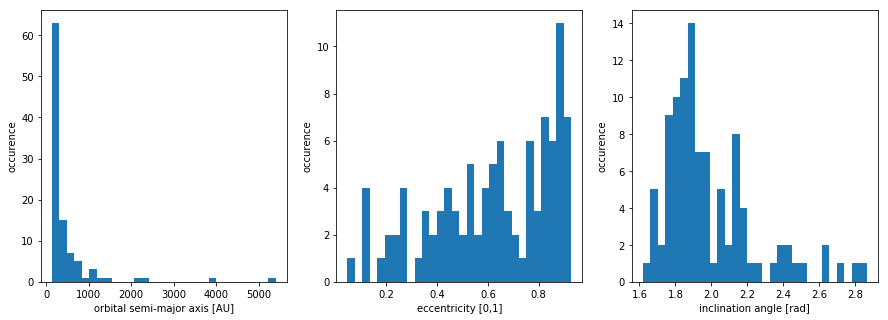

In [14]:
import matplotlib.pyplot as plt
# Histograms of the posterior:
sma = [x[s.system.param_idx['sma1']] for x in orbits]
ecc = [x[s.system.param_idx['ecc1']] for x in orbits]
i = [x[s.system.param_idx['inc1']] for x in orbits]

%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(sma, bins=30)
plt.xlabel('orbital semi-major axis [AU]')
plt.ylabel('occurence')

plt.subplot(132)
plt.hist(ecc, bins=30)
plt.xlabel('eccentricity [0,1]')
plt.ylabel('occurence')

plt.subplot(133)
plt.hist(i, bins=30)
plt.xlabel('inclination angle [rad]')
plt.ylabel('occurence')

plt.show()

In [15]:
# Initialize the results object for plotting:
myResults = s.results

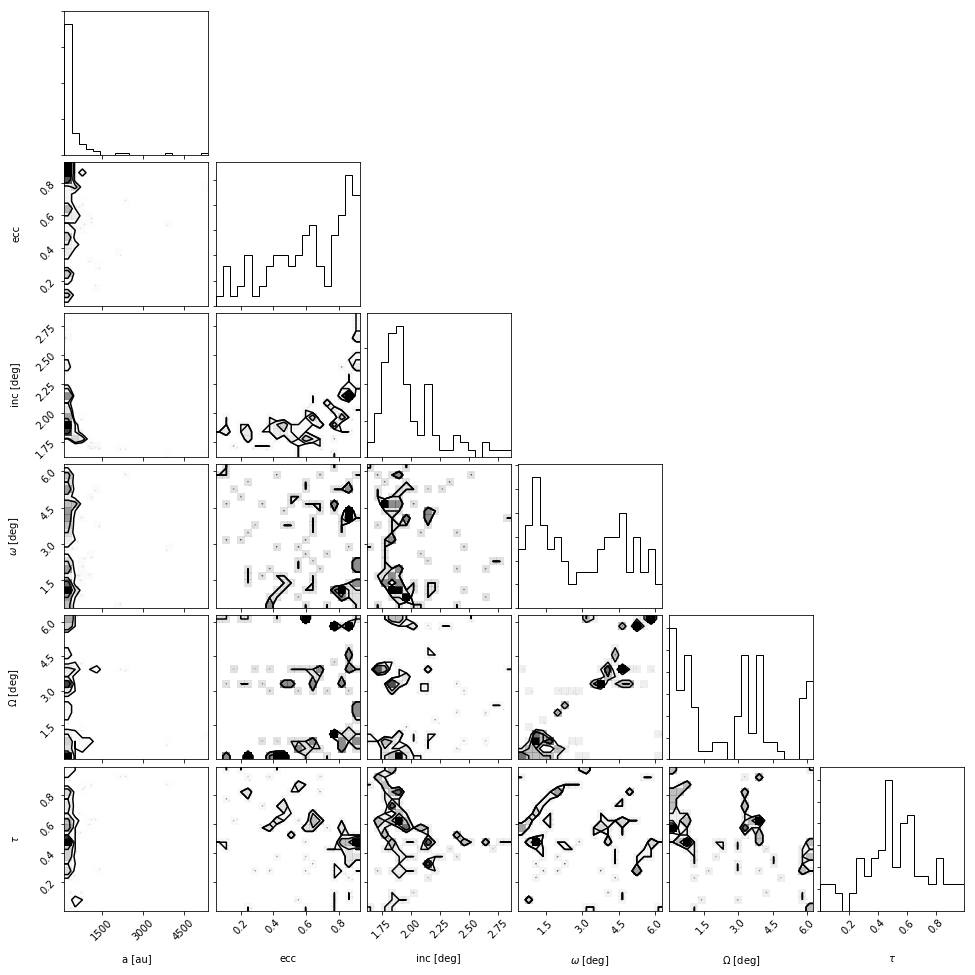

In [16]:
corner_figure = myResults.plot_corner(param_list=['sma1', 'ecc1', 'inc1', 'aop1', 'pan1','epp1'])

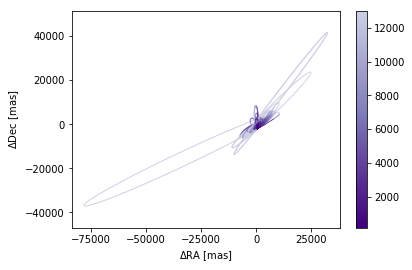

In [17]:
# Plot a random selection of the posterior orbits:
orbit_figure = myResults.plot_orbits(
    start_mjd=s.epochs[0] # Minimum MJD for colorbar (here we choose first data epoch)
)